# Exercise 1: Linear Regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import syn_dataset

## 1. Data exploration
This is a synthetic dataset of 100 samples and two variables. 
* X is the advertising expediture of one year
* y is the sales revenus of that year 

Based on this dataset, Suppose you have 5.2 million dollars advertising budget for the next year, you would like to predict the revenue.

In [2]:
X, y = syn_dataset.make_data()
y = y.reshape((100, 1)) #reshape y to a column vector

In [3]:
print(y.shape)
print(X.shape)

(100, 1)
(100, 1)


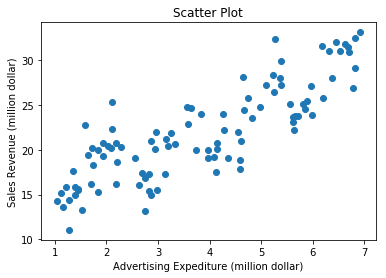

In [4]:
plt.scatter(X, y)
plt.title("Scatter Plot")
plt.xlabel("Advertising Expediture (million dollar)")
plt.ylabel("Sales Revenue (million dollar)");

## 2. Define cost function $J(\theta)$
Recall that the cost function is defined :
$J\left(\theta_{0}, \theta_{1}\right)=\frac{1}{2 m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}$

In [5]:
# number of training examples
m = len(y)
print(m)

100


In [6]:
# adding ones into X
ones = np.ones((m, 1));
X = np.append(ones, X, axis = 1)
print(X.shape)

(100, 2)


In [25]:
# initializing parameters
theta = np.zeros((2, 1))
print(theta.shape)
iters = 1000; 
lr = 0.1;   #learning rate: how big is each step

(2, 1)


In [26]:
def cost_func(X, y, theta):
    m = len(y)
    h = X.dot(theta) 
    return np.sum((h - y) ** 2) / (2 * m)

## 3. Gradient Descent
Recall that in gradient descent, we update $\theta$ iteratively until it converges.

$\theta_{0} =\theta_{0}-\alpha \frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{0}^{(i)}$

$\theta_{1} =\theta_{1}-\alpha \frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{1}^{(i)}$

In [27]:
# vectorization implementation of gradient descent
def grad_descent(X, y, theta, lr, iters):
    m = len(y)
    X_T = np.transpose(X)   
    for i in range(iters):
        h = X.dot(theta)
        delta = X_T.dot(h - y)
        theta -= lr*delta / m     
        cost = cost_func(X, y, theta)
        print(cost)
    return theta

In [28]:
theta = grad_descent(X, y, theta, lr, iters)

191.0419864082714
144.46541118133484
110.0504317393981
84.60194997625493
65.76494879712732
51.8035888683156
41.43839366747427
33.72624801958636
27.971951947649778
23.663032099931797
20.421694977200136
17.969414379320387
16.100830797622493
14.664514099771214
13.548784748226987
12.671263370175465
11.971168279547607
11.40363835611523
10.93554869913713
10.542426520104227
10.206177959624677
9.91341259126871
9.654208447667331
9.42120173189639
9.208915837433032
9.013266750443243
8.831198455088463
8.660414158313104
8.499178139367451
8.346169654434568
8.200375209715391
8.061009115290489
7.927454884664704
7.799221999969623
7.675914003767145
7.557204940452583
7.44282195303586
7.332532418022473
7.226134426348319
7.123449731737899
7.024318518857071
6.928595513890631
6.836147085664397
6.746849077923731
6.660585181552197
6.577245705760837
6.496726644313598
6.418928960151951
6.343758031902323
6.271123220580693
6.200937525740497
6.1331173083684165
6.067582063772709
6.004254232087947
5.943059037248552
5

In [30]:
theta

array([[12.47495442],
       [ 2.47237008]])

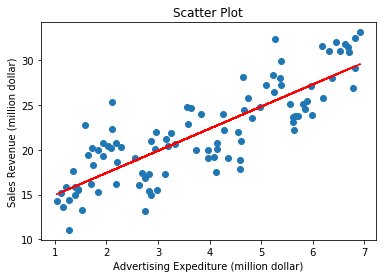

In [31]:
plt.scatter(X[:,1], y)
plt.title("Scatter Plot")
plt.xlabel("Advertising Expediture (million dollar)")
plt.ylabel("Sales Revenue (million dollar)")
plt.plot(X[:,1], X.dot(theta).reshape(100,), 'r--')

## 4. Using learned parameters to predict
Now, we use learned theta to predict next year's revenue.

In [32]:
X_next = np.array([1, 5.2])
predict = X_next.dot(theta)[0]

In [33]:
predict

25.331278834751117